# **Star Dataset**

Gabriel Felipe Machado de Oliveira, 2022

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [99]:
data = pd.read_csv('star_data.csv')

# **1. Introdução: Star Dataset**
O conjunto de dados utilizado traz informações sobre estrelas de 6 diferentes tipos: Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants. Os dados levaram cerca de 3 semanas para serem coletados.

In [100]:
data.shape

(240, 7)

Trata-se de um dataset com 240 instâncias, isto é, 240 características de estrelas, e 7 variáveis:

In [60]:
print('Variáveis:', list(data.columns))

Variáveis: ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class']


Segue abaixo o detalhamento das variávies:
- Temperature (K): temperatura da estrela em Kelvin;
- Luminosity (L/Lo): razão entre a luminosidade da estrela e a luminosidade solar;
- Radius (R/Ro): razão entre o raio da estrela e o raio solar;
- Absolute magnitude (Mv): a magnitude abdoluta da estrela;
- Star type: é o tipo da estrela, classe indo de 0 a 5 inclusos;
- Star color: cor da estrela;
- Spectral Class: a classe espectral da estrela.


In [101]:
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


## 1.1. Objetivo
O objetivo dos dados é provar que as estrelas seguem um determinado gráfico no espaço celeste,
especificamente chamado Hertzsprung-Russell ou HR-Diagram, ele nos permite classificar as estrelas traçando suas características com base no gráfico abaixo.

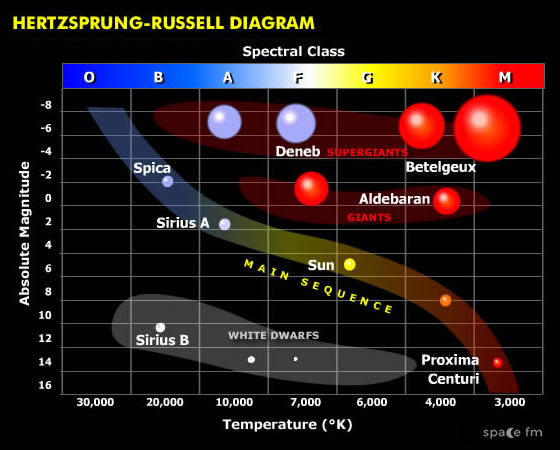

Para contribuir com a tese, o seguinte projeto visa testar modelos de Machine Learning de classifição. Com isso, poderemos apoiar a tese acima ou descartá-la com base nas precisões das predições.

# **2. Analise Exploratória**
Inicialmente, após importarmos os dados, precisamos analisar afundo suas variáveis. Esta análise inicial será a base de todo o projeto. Através dela, nos familiarizaremos com o conjunto e teremos a certeza de que os modelos de predição poderão atuar em um dataset tratado e limpo.



## 2.1. Limpeza 
Vamos verificar se há valores nulos no conjunto.

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [63]:
data.isna()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
235,False,False,False,False,False,False,False
236,False,False,False,False,False,False,False
237,False,False,False,False,False,False,False
238,False,False,False,False,False,False,False


Não há valores nulos, verifiquemos a existência de valores Na:

In [64]:
data.isna()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
235,False,False,False,False,False,False,False
236,False,False,False,False,False,False,False
237,False,False,False,False,False,False,False
238,False,False,False,False,False,False,False


Também não há valores Na, podemos assim, passar para o próximo passo.

## 2.2. Verificando as distribuições
Para as variaveis quantitativas/numéricas, iremos analisar suas distribuições e seus boxplots. Essa análise, nos permitirá tirar hipóteses para modelarmos e, eventualmente, predizermos a variável resposta.

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 225
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         177 non-null    int64  
 1   Luminosity(L/Lo)        177 non-null    float64
 2   Radius(R/Ro)            177 non-null    float64
 3   Absolute magnitude(Mv)  177 non-null    float64
 4   Star type               177 non-null    int64  
 5   Star color              177 non-null    object 
 6   Spectral Class          177 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 11.1+ KB


#### **Temperature (K)**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


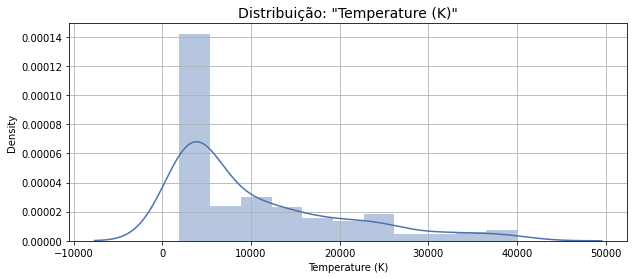

In [65]:
sns.set_palette("deep")
plt.figure(figsize = (10,4))
plt.title('Distribuição: "Temperature (K)"', fontsize = 14)
sns.distplot(data['Temperature (K)'])
plt.grid(True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


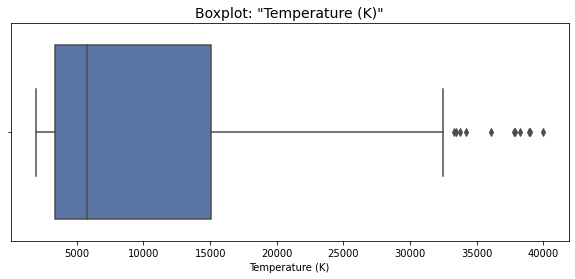

In [178]:
plt.figure(figsize = (10,4))
sns.boxplot(data['Temperature (K)'])
plt.title('Boxplot: "Temperature (K)"', fontsize = 14)
plt.show()

#### **Luminosity(L/Lo)**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


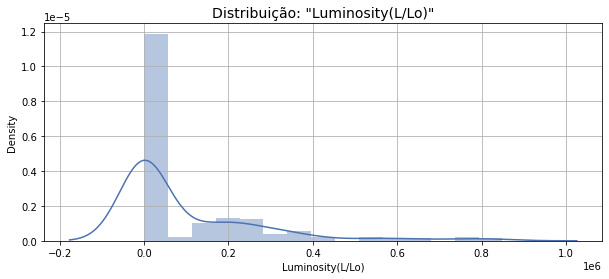

In [73]:
sns.set_palette("deep")
plt.figure(figsize = (10,4))
plt.title('Distribuição: "Luminosity(L/Lo)"', fontsize = 14)
sns.distplot(data['Luminosity(L/Lo)'])
plt.grid(True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


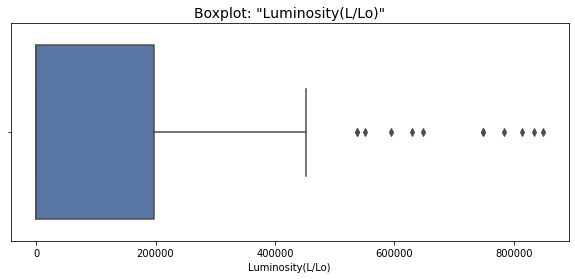

In [177]:
plt.figure(figsize = (10,4))
sns.boxplot(data['Luminosity(L/Lo)'])
plt.title('Boxplot: "Luminosity(L/Lo)"', fontsize = 14)
plt.show()

#### **Radius(R/Ro)**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


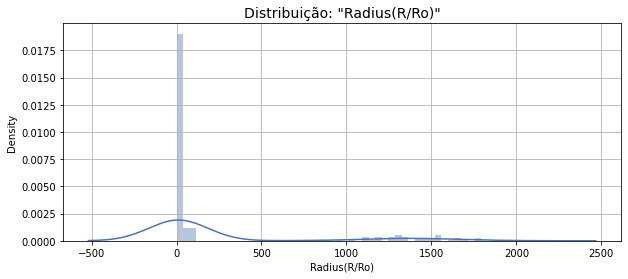

In [102]:
sns.set_palette("deep")
plt.figure(figsize = (10,4))
plt.title('Distribuição: "Radius(R/Ro)"', fontsize = 14)
sns.distplot(data['Radius(R/Ro)'])
plt.grid(True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


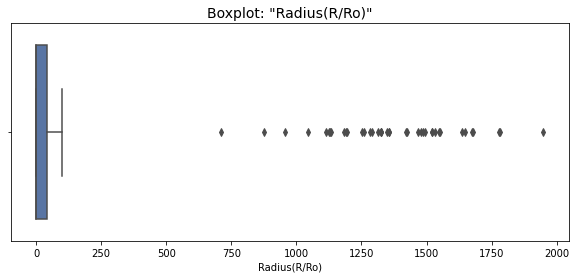

In [176]:
plt.figure(figsize = (10,4))
sns.boxplot(data['Radius(R/Ro)'])
plt.title('Boxplot: "Radius(R/Ro)"', fontsize = 14)
plt.show()

#### **Absolute magnitude(Mv)**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


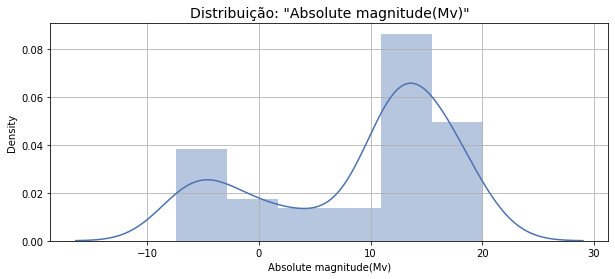

In [91]:
sns.set_palette("deep")
plt.figure(figsize = (10,4))
plt.title('Distribuição: "Absolute magnitude(Mv)"', fontsize = 14)
sns.distplot(data['Absolute magnitude(Mv)'])
plt.grid(True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


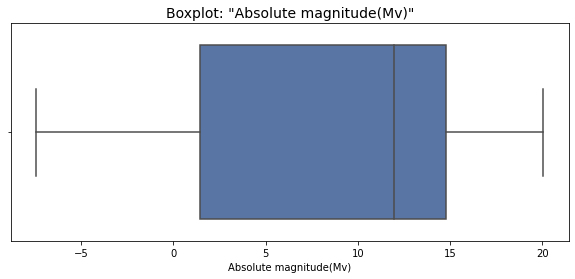

In [92]:
plt.figure(figsize = (10,4))
sns.boxplot(data['Absolute magnitude(Mv)'])
plt.title('Boxplot: "Absolute magnitude(Mv)"', fontsize = 14)
plt.show()

Perceba que 3 das 4 variáveis numericas que analisamos possuem outliers. Num primeiro momento não iremos excluí-los do conjunto.

## 2.3. Variáveis categóricas
Após analisarmos as variáveis quantitativas, analisaremos afundo as variáveis qualitativas/categóricas que temos no modelo.

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 225
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         177 non-null    int64  
 1   Luminosity(L/Lo)        177 non-null    float64
 2   Radius(R/Ro)            177 non-null    float64
 3   Absolute magnitude(Mv)  177 non-null    float64
 4   Star type               177 non-null    int64  
 5   Star color              177 non-null    object 
 6   Spectral Class          177 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 11.1+ KB


#### **Star type**

Primeiro, vamos ver os possíveis valores para os tipos de estrela, que é nossa variável resposta.

In [108]:
data['Star type'].unique()

array([0, 1, 2, 3, 4, 5])

Sabemos que esse valores são, na verdade, rótulos para os tipos de estralas *(Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)*.

In [179]:
star_type = {'Rótulo':data['Star type'].unique(),'Tipo da Estrela':['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence' , 'SuperGiants', 'HyperGiants']}
var_resposta = pd.DataFrame(star_type)
var_resposta.set_index('Rótulo')


,Tipo da Estrela
Rótulo,
0,Red Dwarf
1,Brown Dwarf
2,White Dwarf
3,Main Sequence
4,SuperGiants
5,HyperGiants


Acima um dataframe completo com a relação dos rótulos da variável reposta.

#### **Spectral Class**

Outra variável categórica é a "Spectral Class", esta ainda não está rotulada, vamos ver os valores possíveis para o campo:

In [114]:
data['Spectral Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

Perceba que há letras maiúsculas que representam classe esectrais, para entendermos melhor:

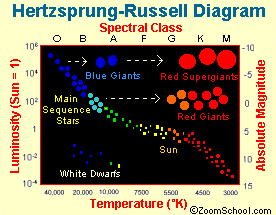

Agora, precisamos rotular essa feature. Afinal, em nossos modelos atuaremos com variáveis numéricas. Assim, usaremos o LabelEncoder() para essa codificação.

In [115]:
from sklearn import preprocessing

label_encoder1 = preprocessing.LabelEncoder()
data['Spectral Class'] = label_encoder1.fit_transform(data['Spectral Class'])
data['Spectral Class'].value_counts()

5    111
1     46
6     40
0     19
2     17
4      6
3      1
Name: Spectral Class, dtype: int64

In [116]:
data['Spectral Class'].unique()

array([5, 1, 0, 2, 6, 4, 3])

#### **Star color**

Por último, temos a "Star color" sendo categórica, atuaremos nela de maneira similar.

In [118]:
data['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

In [119]:
label_encoder1 = preprocessing.LabelEncoder()
data['Star color'] = label_encoder1.fit_transform(data['Star color'])
data['Star color'].value_counts()

10    112
0      55
6      26
2      10
17      8
11      7
3       3
15      3
16      3
13      2
7       2
18      2
9       1
12      1
1       1
14      1
8       1
4       1
5       1
Name: Star color, dtype: int64

In [120]:
data['Star color'].unique()

array([10,  2, 11, 15,  3,  9,  0,  6, 13, 17,  7, 12, 16,  1, 18, 14,  8,
        4,  5])

Concluímos as codificações, vejamos como os tipos de dados mudaram:

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    int64  
 6   Spectral Class          240 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 13.2 KB


## 2.4. Correlações
A partir daqui, nossa análise não será na estrutura de nossas variáveis, e sim nas estatísticas que elas possuem. Primeiramente, vamos resumir todas as features:

In [122]:
data.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000,7.250000,3.758333
std,9552.425037,179432.244940,517.155763,10.532512,1.711394,4.926659,2.090007
min,1939.000000,0.000080,0.008400,-11.920000,0.000000,0.000000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000,2.000000,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000,10.000000,5.000000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000,10.000000,5.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000,18.000000,6.000000


Só com esse resumo já podemos extrair alguns insights. O campo "std" para as variáveis numéricas, são bem altos, ou seja, a variância nesse campos é alta. Um fator que pode estar atrapalhando é a presença de outliers. Na predição, caso não tenhamos bons resultados, seria interessantos excluirmos esse valores do modelo.

Uma outra análise fundamental é a matriz de correlações:

In [123]:
data.corr()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
Temperature (K),1.000000,0.393404,0.064216,-0.420261,0.411129,-0.697438,-0.207852
Luminosity(L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845,-0.393509,0.275280
Radius(R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975,-0.000818,0.097124
Absolute magnitude(Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.955276,0.333552,-0.085840
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000,-0.317103,-0.049131
Star color,-0.697438,-0.393509,-0.000818,0.333552,-0.317103,1.000000,-0.006298
Spectral Class,-0.207852,0.275280,0.097124,-0.085840,-0.049131,-0.006298,1.000000


A forma matricial pouca informção nos fornece, vejamos um mapa de calor

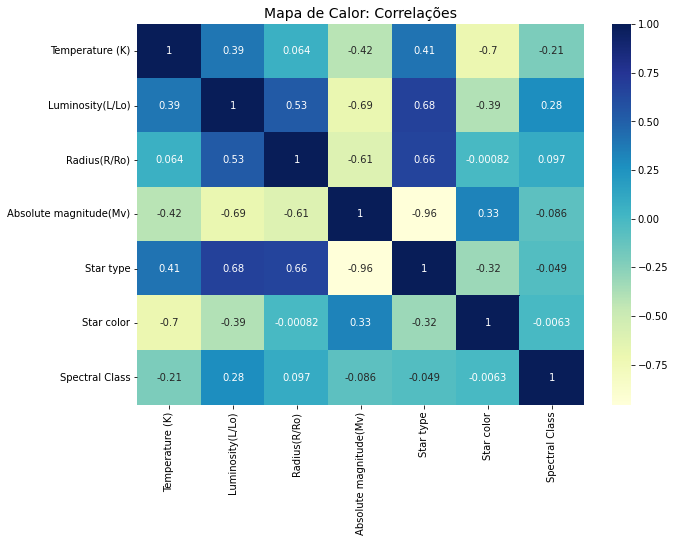

In [130]:
plt.figure(figsize = (10,7))
plt.title('Mapa de Calor: Correlações', fontsize = 14)
ax = sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)


Não há correlações significativas entre nossa variáveis explicativas. Ainda em busca de correlações, podemos ver gráficos de dispersão entre as variáveis.

<Figure size 720x504 with 0 Axes>

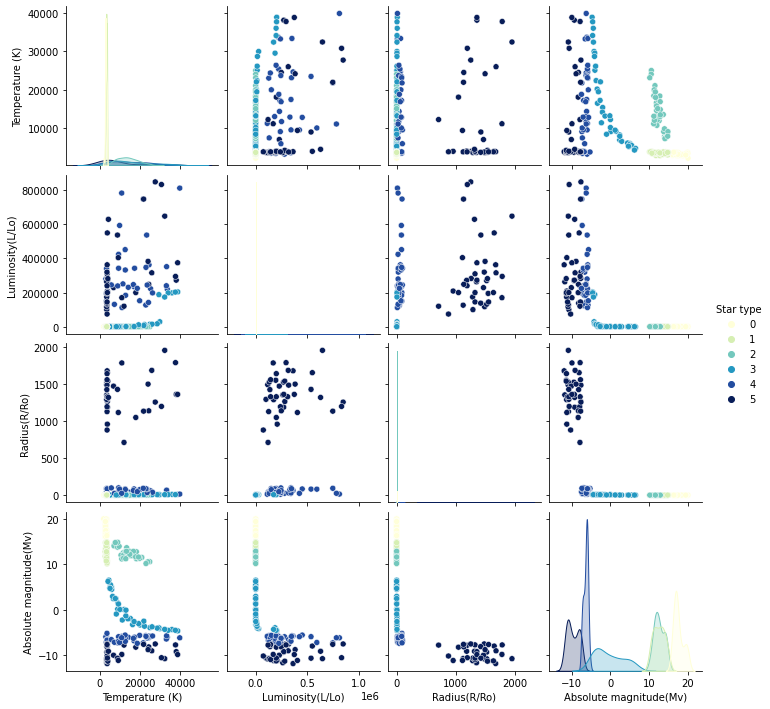

In [133]:
plt.figure(figsize = (10,7))
sns.pairplot(data.drop(columns=['Star color', 'Spectral Class']) , hue= 'Star type', palette='YlGnBu')

# **3. Pré-Processamento**

O última passo antes de finalmente predizermos será o pré-processamento. Aqui, dividiremos os conjuntos de teste e treinamento e normalizaremos nossas variáveis. O processo de normalização será necssário pois temos medidas totalmente distintas, com escalas e unidades de medida diferentes.

### 3.1. Dados de teste e treino

In [135]:
from sklearn.model_selection import train_test_split

X = data.drop(columns = ['Star type'])
y = data['Star type']

X_train, X_test, y_train, y_test = train_test_split(X, y)

### 3.2. Normalização

In [136]:
from sklearn.preprocessing import StandardScaler

scaleX = StandardScaler()

In [137]:
X_train = scaleX.fit_transform(X_train)
X_test = scaleX.fit_transform(X_test)

# **4. Modelos de Predição**

Finalmente chegamos a parte mais importante do projeto: tester e analisar os modelos de predição.

In [139]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

Listas que irão guardar as acurácias:

In [161]:
mse_list = []
accuracy_list = []

## 4.1. Logistic Regression

In [162]:
logistic_regression = LogisticRegression() #iniciando o construtor

logistic_regression.fit(X_train, y_train) #Treinando com o conjunto de treino

y_pred = logistic_regression.predict(X_test) #Predizendo os valores

accuracyLR = round(accuracy_score(y_test, y_pred), 4)
mseLR = round(mean_squared_error(y_test, y_pred),4)

accuracy_list.append(accuracyLR)
mse_list.append(mseLR)

print('Accuracy: ', accuracyLR)
print('MSE:', mseLR)

Accuracy:  0.9167
MSE: 0.0833


## 4.2. XGBClassifier

In [163]:
xgbclassifier = XGBClassifier()

xgbclassifier.fit(X_train, y_train)

y_pred = xgbclassifier.predict(X_test)

accuracyXGB = round(accuracy_score(y_test, y_pred), 4)
mseXGB = round(mean_squared_error(y_test, y_pred),4)

accuracy_list.append(accuracyXGB)
mse_list.append(mseXGB)

print('Accuracy: ', accuracyXGB)
print('MSE:', mseXGB)

Accuracy:  0.65
MSE: 0.55


## 4.3. KNeighborsClassifier

In [164]:
kclassifier = KNeighborsClassifier()

kclassifier.fit(X_train, y_train)

y_pred = kclassifier.predict(X_test)

accuracyknn = round(accuracy_score(y_test, y_pred), 4)
mseknn = round(mean_squared_error(y_test, y_pred),4)

accuracy_list.append(accuracyknn)
mse_list.append(mseknn)

print('Accuracy: ', accuracyknn)
print('MSE:', mseknn)

Accuracy:  0.95
MSE: 0.05


## 4.4. RandomForestClassifier

In [165]:
randomforest = RandomForestClassifier()

randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)

accuracyrandom = round(accuracy_score(y_test, y_pred), 4)
mserandom = round(mean_squared_error(y_test, y_pred),4)

accuracy_list.append(accuracyrandom)
mse_list.append(mserandom)

print('Accuracy: ', accuracyrandom)
print('MSE:', mserandom)

Accuracy:  0.8833
MSE: 0.1167


## 4.5. AdaboostClassifier

In [166]:
ada = AdaBoostClassifier(n_estimators=100)

ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

accuracyada = round(accuracy_score(y_test, y_pred), 4)
mseada = round(mean_squared_error(y_test, y_pred),4)

accuracy_list.append(accuracyada)
mse_list.append(mseada)

print('Accuracy: ', accuracyada)
print('MSE:', mseada)

Accuracy:  0.4667
MSE: 0.7333


## 4.6. DecisionTreeClassfier

In [167]:
dectree = DecisionTreeClassifier()

dectree.fit(X_train, y_train)

y_pred = dectree.predict(X_test)

accuracydectree = round(accuracy_score(y_test, y_pred), 4)
msedectree = round(mean_squared_error(y_test, y_pred),4)

accuracy_list.append(accuracydectree)
mse_list.append(msedectree)

print('Accuracy: ', accuracydectree)
print('MSE:', msedectree)

Accuracy:  0.9
MSE: 0.3


## 4.7. SGDClassifier

In [168]:
sgdc = SGDClassifier()

sgdc.fit(X_train, y_train)

y_pred = sgdc.predict(X_test)

accuracySGD = round(accuracy_score(y_test, y_pred), 4)
mseSGD = round(mean_squared_error(y_test, y_pred),4)

accuracy_list.append(accuracySGD)
mse_list.append(mseSGD)

print('Accuracy: ', accuracySGD)
print('MSE:', mseSGD)

Accuracy:  0.95
MSE: 0.05


## 4.8. GaussianNB

In [169]:
gaussian = GaussianNB()

gaussian.fit(X_train, y_train)

y_pred = gaussian.predict(X_test)

accuracygaussian = round(accuracy_score(y_test, y_pred), 4)
msegaussian = round(mean_squared_error(y_test, y_pred),4)

accuracy_list.append(accuracygaussian)
mse_list.append(msegaussian)

print('Accuracy: ', accuracygaussian)
print('MSE:', msegaussian)

Accuracy:  0.5167
MSE: 1.8833


# **5.6. Sumarização dos Resultados e Conclusão**
Por fim, vamos analisar as acurácias e os Erros Quadráticos Médios através de um DataFrame.

In [185]:
classificadores = ['Logistic Regression', 
                   'XGBClassifier', 
                   'KNeighborsClassifier', 
                   'RandomForestClassifier', 
                   'AdaBoostClassifier',
                   'DecisionTreeClassifier', 
                   'SGDClassifier', 
                   'GaussianNB']

dic = {'Models': classificadores, 'Accuracy': accuracy_list, 'MSE': mse_list}
sum = pd.DataFrame(dic)
sum

,Models,Accuracy,MSE
0,Logistic Regression,0.9167,0.0833
1,XGBClassifier,0.6500,0.5500
2,KNeighborsClassifier,0.9500,0.0500
3,RandomForestClassifier,0.8833,0.1167
4,AdaBoostClassifier,0.4667,0.7333
5,DecisionTreeClassifier,0.9000,0.3000
6,SGDClassifier,0.9500,0.0500
7,GaussianNB,0.5167,1.8833


Vamos colocoar em ordem crescente com base na acurácia.

In [173]:
sum.sort_values(by = 'Accuracy', ascending = False)

,Models,Accuracy,MSE
2,KNeighborsClassifier,0.9500,0.0500
6,SGDClassifier,0.9500,0.0500
0,Logistic Regression,0.9167,0.0833
5,DecisionTreeClassifier,0.9000,0.3000
3,RandomForestClassifier,0.8833,0.1167
1,XGBClassifier,0.6500,0.5500
7,GaussianNB,0.5167,1.8833
4,AdaBoostClassifier,0.4667,0.7333


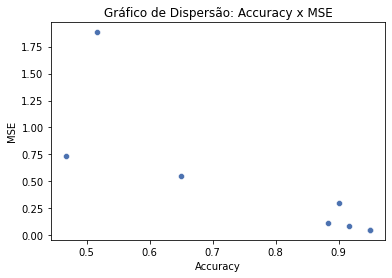

In [184]:
plt.title('Gráfico de Dispersão: Accuracy x MSE')
sns.scatterplot(data = sum, x = 'Accuracy', y = 'MSE')
plt.show()

#### **Conclusão**
Conseguimos alcançar 95% de acurácia com o modelo KNeighborsClassifier e com o SGDClassifier para o conjunto de dados de estrelas e seus tipos. Dentre os testados, foram os que melhores predizeram.

Perceba que os piores modelos foram aqueles que tem como base a combinação de árvores de decisão. Isso nos mostra que a complexidade e a robustez de um modelo não necessariamente implica que ele atuará muito bem em todos os conjuntos de dados.

Concluímos então, que o melhores modelos para a predição dos tipos de estrelas são: (1) KNeighborsClassifier; (2) SGDClassifier; e (2) Logistic Regression. Isso pode nos indicar que o diagrama de Hertzsprung-Russell possui também uma alta precisão de classificação, afinal, os melhores modelos atuam de maneira similar à teoria de Russel.  